# Lead Scoring Case Study
By Shiladitya Chakraborty

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Steps for the Analysis
1. Importing the data
2. Inspecting the data
3. Data Cleaning
4. Exploratory Data Analysis(EDA)
5. Data Preparation for Model Building
6. Train-test Split
7. Feature Scaling using Standard Scalar
8. Checking Correlations among the variables
9. Model Building
10. Prediction on the Train set
11. Plotting the ROC Curve
12. Finding the Optimal Cut-off point
13. Predictions on the Test Set

### Step 1: Importing the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing the required libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Importing the dataset
leads_data = pd.read_csv("Leads.csv")

### Step 2: Inspecting the dataframe

In [3]:
# Viewing the head of the data
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking the dimension of the dataframe
leads_data.shape

(9240, 37)

In [5]:
#Checking the column-wise information of the dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking the statistical summary of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Cleaning

#### 3.1 - Checking for duplicate values 

In [7]:
#Checking for duplicates in the "Prospect ID" and "Lead Number" Columns

#Prospect ID
if sum(leads_data.duplicated(subset = 'Prospect ID')) == 0:
    print("No duplicate in 'Prospect ID'")

#Lead Number
if sum(leads_data.duplicated(subset = 'Lead Number')) == 0:
    print("No duplicate in 'Lead Number'")

No duplicate in 'Prospect ID'
No duplicate in 'Lead Number'


#### 3.2 - Checking for missing values 

##### 3.2.1: Replacing "Select" with null values

There are many columns with value as "Select". This means that the user had not selected the option for that particular column. We shall treat this as missing values.

In [8]:
#Replacing 'Select' values with Nan
leads_data=leads_data.replace("Select", np.nan)

In [9]:
#Checking the percentage of null values in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are many columns with high percentage of null values. For the analysis we will drop the columns with a null value percentage of more than 30%. For the rest of the columns, we will try to impute the missing values

##### 3.2.1 - Dropping columns with a high percentage of missing values (>=30%) 

In [10]:
#Dropping columns
columns = leads_data.columns

for i in columns:
    if((100*(leads_data[i].isnull().sum()/len(leads_data.index))) >= 30):
        leads_data.drop(i, 1, inplace = True)

In [11]:
#checking the shape of the dataframe
leads_data.shape

(9240, 27)

In [12]:
#Checking the percentage of null values in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

##### 3.2.2: Analysing columns with less than 30% missing values

In [13]:
#Analysis of column "Country"
leads_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

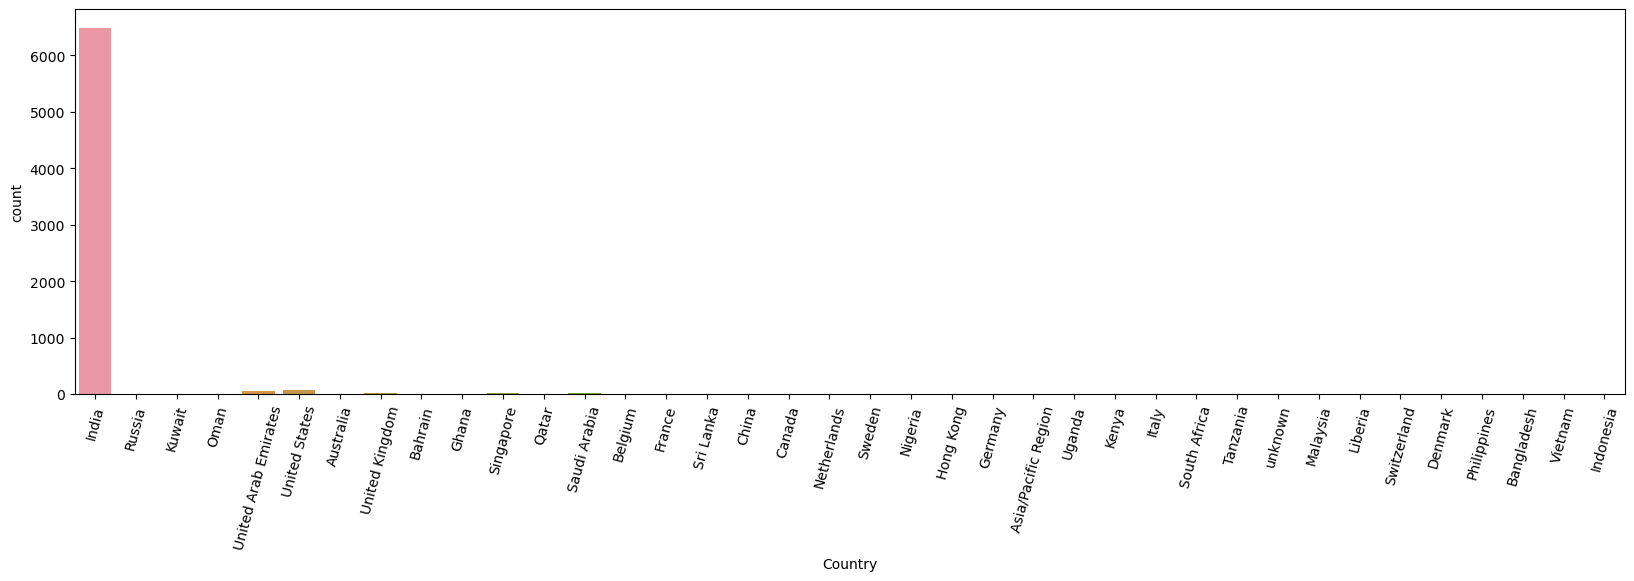

In [14]:
#Plotting count plot to visualize counts of data of 'Country' column.
plt.figure(figsize=(20,5))
sns.countplot(x = "Country", data = leads_data)
plt.xticks(rotation=75)
plt.show()

We can see that around 70% of the values of the column "Country" is "India". This column is highly skewed, hence dropping this column from our analysis.

In [15]:
#Dropping column "Country"
leads_data.drop("Country",1,inplace=True)

In [16]:
#Checking the percentage of null values in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
#Analysis of column "What is your current occupation"
leads_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

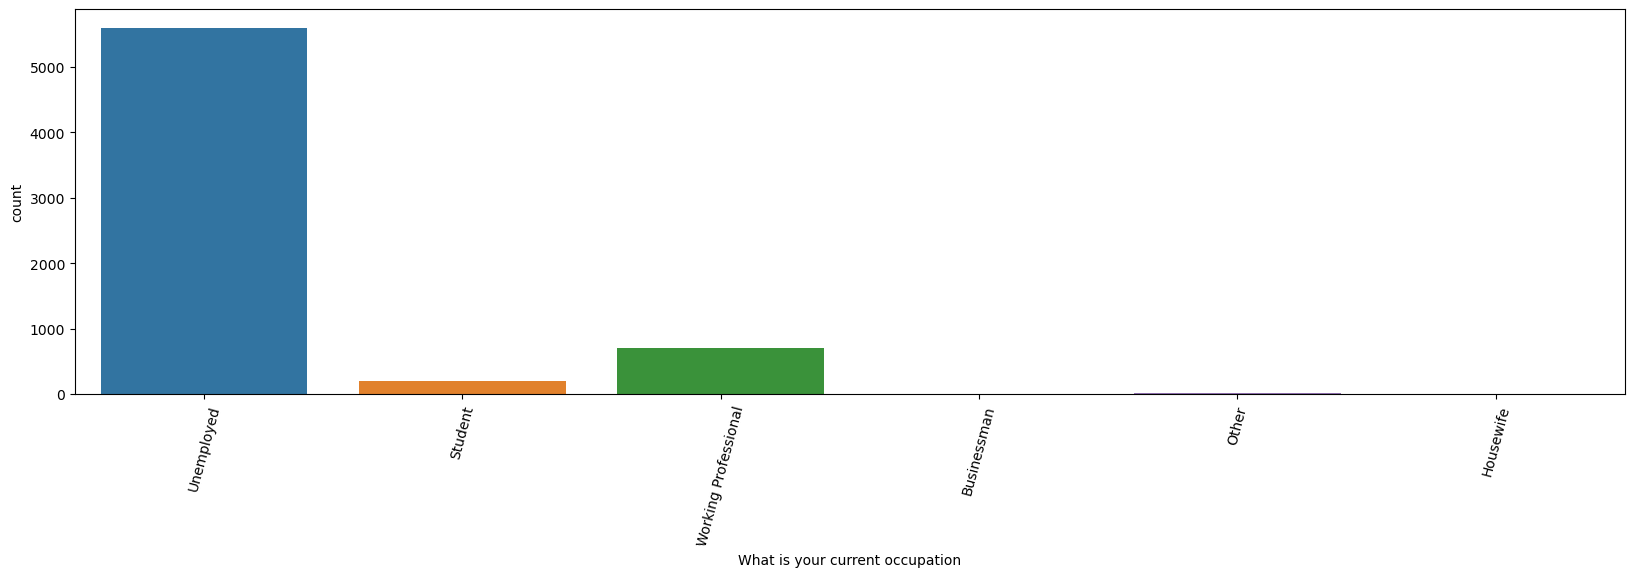

In [18]:
#Plotting count plot to visualize counts of data of 'What is your current occupation' column.
plt.figure(figsize=(20,5))
sns.countplot(x = "What is your current occupation", data = leads_data)
plt.xticks(rotation=75)
plt.show()

We can impute the missing values with a new value as "Not Provided"

In [19]:
#Imputing values
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Not provided')

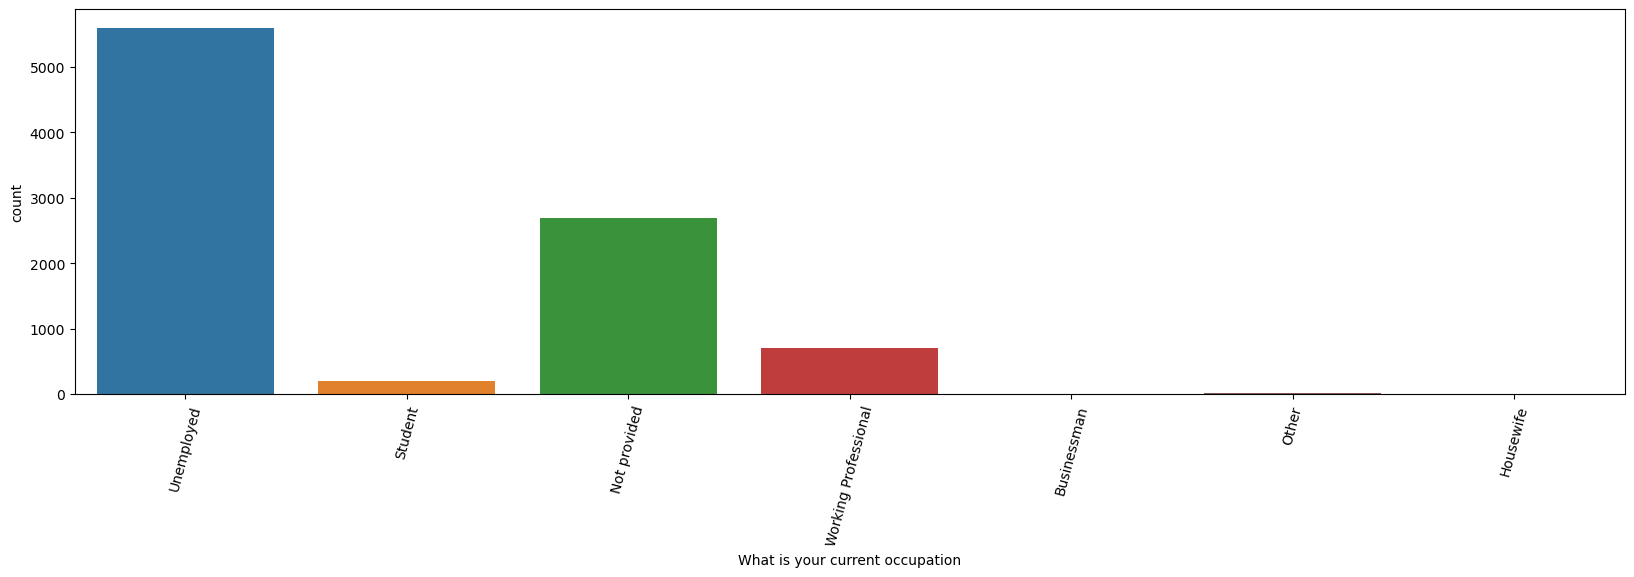

In [20]:
#Plotting count plot to visualize counts of data of 'What is your current occupation' column.
plt.figure(figsize=(20,5))
sns.countplot(x = "What is your current occupation", data = leads_data)
plt.xticks(rotation=75)
plt.show()

In [21]:
#Checking the percentage of null values in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [22]:
#Analysis of column "What matters most to you in choosing a course"
leads_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

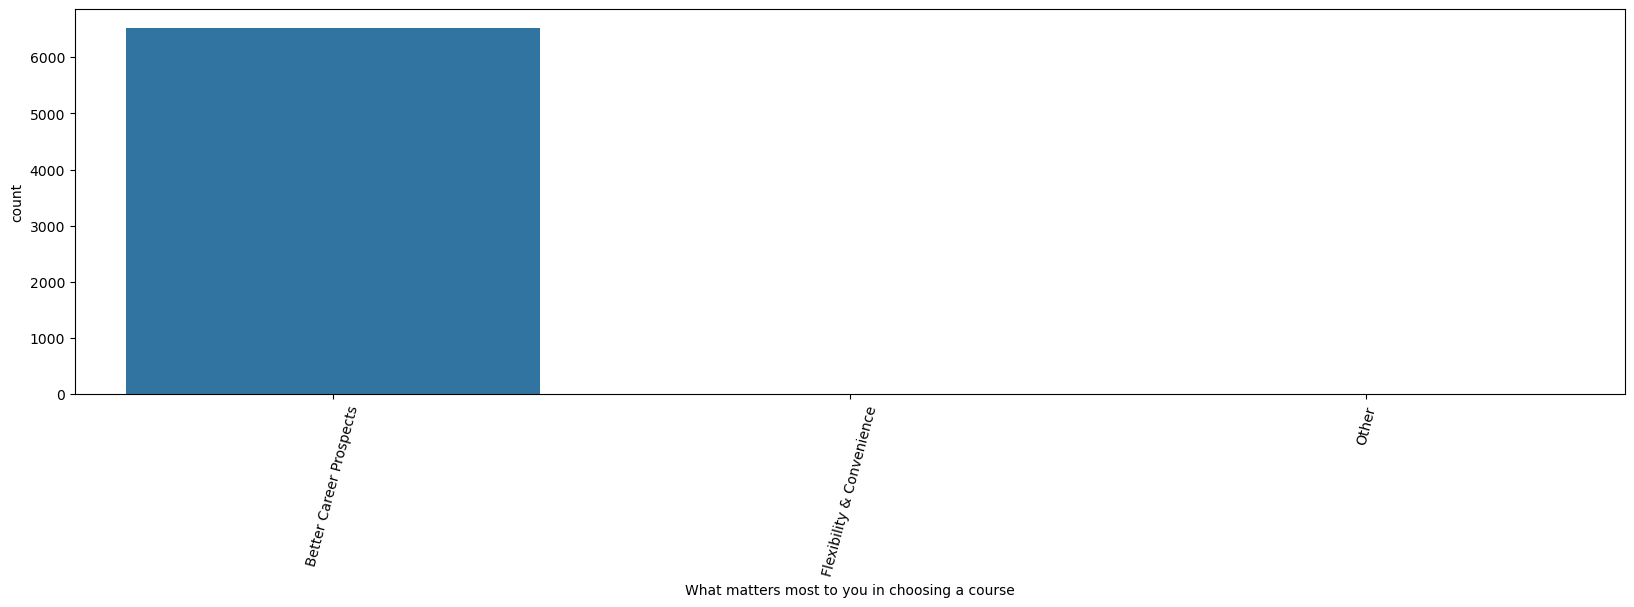

In [23]:
#Plotting count plot to visualize counts of data of 'What matters most to you in choosing a course' column.
plt.figure(figsize=(20,5))
sns.countplot(x = "What matters most to you in choosing a course", data = leads_data)
plt.xticks(rotation=75)
plt.show()

We can impute the missing values with "Better Career Prospects" since it has the largest frequency.

In [24]:
#Imputing values
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

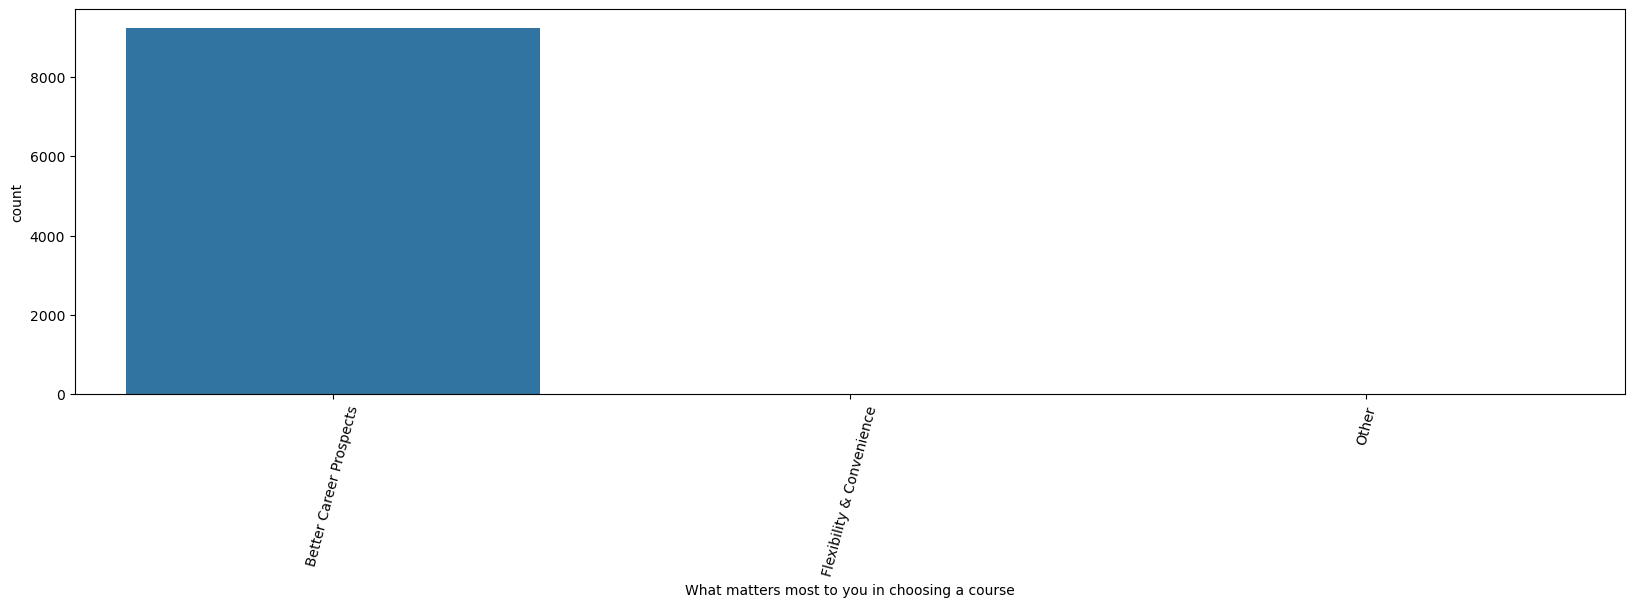

In [25]:
#Plotting count plot to visualize counts of data of 'What matters most to you in choosing a course' column.
plt.figure(figsize=(20,5))
sns.countplot(x = "What matters most to you in choosing a course", data = leads_data)
plt.xticks(rotation=75)
plt.show()

In [26]:
#Checking the percentage of null values in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

The percentage of missing values for the remaining columns is very less. Hence, we can drop the records without affecting our analysis

In [27]:
#Dropping the remaining missing value records
leads_data = leads_data.dropna()

In [28]:
#checking the shape of the dataframe
leads_data.shape

(9074, 26)

In [29]:
#data retention percentage
round((9074/9240)*100,2)

98.2

In [30]:
#Checking the percentage of null values in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [31]:
leads_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

#### 3.3 - Checking for imbalance in the data 

In [32]:
columns = list(leads_data.columns)

for i in columns:
    print("Checking for imbalance in {} using value_counts".format(i))
    print(leads_data[i].value_counts(), '\n')

Checking for imbalance in Prospect ID using value_counts
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64 

Checking for imbalance in Lead Number using value_counts
660737    1
602411    1
602438    1
602435    1
602420    1
         ..
630128    1
630135    1
630139    1
630158    1
579533    1
Name: Lead Number, Length: 9074, dtype: int64 

Checking for imbalance in Lead Origin using value_counts
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead 

We can see that columns are having skewed data and these variables will not contribute significatly to the analysis. Hence we shall drop these columns - 
1. 'Do Not Call'
2. 'Search'
3. 'Magazine'
4. 'Newspaper Article'
5. 'X Education Forums'
6. 'Newspaper,'Digital Advertisement'
7. 'Through Recommendations'
8. 'Receive More Updates About Our Courses'
9. 'Update me on Supply Chain Content'
10. 'Get updates on DM Content'
11. 'I agree to pay the amount through cheque'

Additionally, we have seen earlier that the following columns have unique values, which are nothing but unique identifiers of a particular record. Hence, we shall drop them as well.
1. 'Prospect ID'
2. 'Lead Number' 

In [33]:
#dropping the columns
columns_to_drop = ['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Prospect ID','Lead Number']
leads_data.drop(columns_to_drop,1,inplace=True)

In [34]:
#Checking the dimension of the dataframe
leads_data.shape

(9074, 11)

In [35]:
#Checking the info of the dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Last Notable Activity                   9074 non-null   obje

#### 3.3 - Other data cleaning activities

In [36]:
#Checking the value_counts of 'Lead Source'
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Here we can see that 2 values exists - "Google" and "google". It is better to impute "google" as "Google"

In [37]:
#Imputing "google" as "Google"
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')

In [38]:
#Checking the value_counts of 'Lead Source'
leads_data['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can club the low frequency values into one value as "Others"

In [39]:
#Clubbing low frequency values of 'Lead Source' as 'Others'
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

In [40]:
#Checking the value_counts of 'Lead Source'
leads_data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

In [41]:
#Checking the value_counts of 'Do Not Email'
leads_data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [42]:
#Checking the value_counts of 'Last Activity'
leads_data['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

We can club the low frequency values into one value as "Others"

In [43]:
#Clubbing low frequency values of 'Last Activity' as 'Others'
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

In [44]:
#Checking the value_counts of 'Last Activity'
leads_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Others                         42
Name: Last Activity, dtype: int64

In [45]:
#Checking the value_counts of 'What is your current occupation'
leads_data['What is your current occupation'].value_counts()

Unemployed              5476
Not provided            2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [46]:
#Checking the value_counts of 'A free copy of Mastering The Interview'
leads_data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [47]:
#Checking the value_counts of 'Last Notable Activity'
leads_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

We can drop this column, since it has been added by the sales team.

In [48]:
#dropping the 'Last Notable Activity' column
leads_data.drop(['Last Notable Activity'],1,inplace=True)

In [49]:
#Checking the value_counts of 'Do Not Email'
leads_data['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [50]:
#Checking the info of the dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


### Step 4: Exploratory Data Analysis(EDA)

As per the problem statement, "Converted" is the target variable which indicates whether a lead has been successfully converted or not.
- 0 - Lead not converted
- 1 - Lead converted

#### 4.1: Checking the distribution of the target variable

In [51]:
#Checking the conversion rate -
(sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100

37.85541106458012

In [52]:
#Checking value count of variable 'Converted'
leads_data.Converted.value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

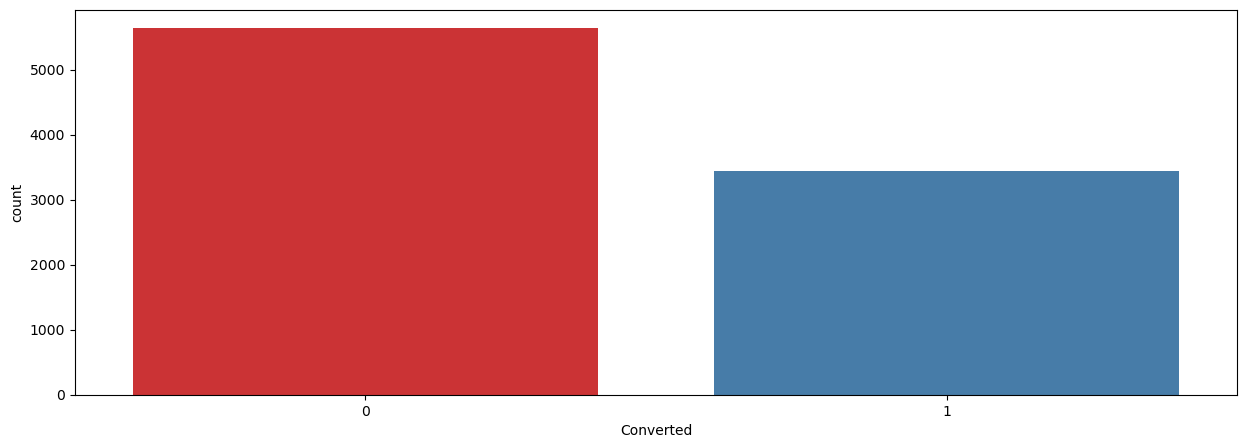

In [53]:
#Plotting count plot to visualize counts of data of the target column.
plt.figure(figsize=(15,5))
sns.countplot(x = 'Converted', data = leads_data, palette = 'Set1')
plt.xticks()
plt.show()

#### 4.2: Categorical Variable Analysis
Categorical Columns -
1. Lead Origin
2. Lead Source
3. Do Not Email
4. Last Activity
5. What is your current occupation
6. A free copy of Mastering The Interview

In [54]:
cat_columns = ['Lead Origin','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview']

##### 4.2.1: Analysis of 'Lead Origin'

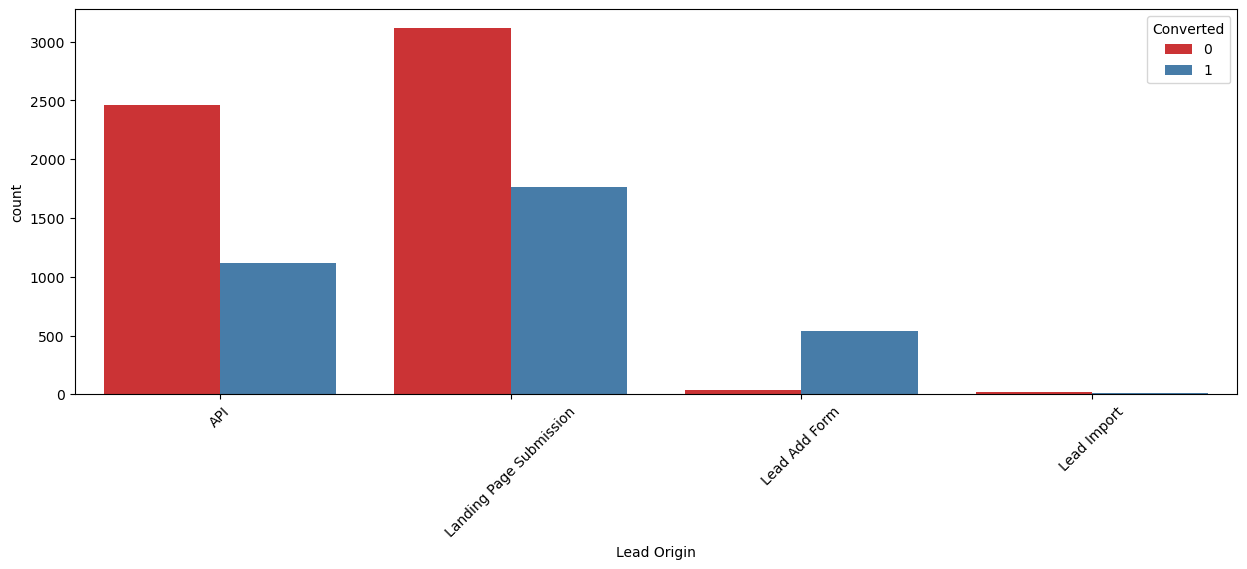

In [55]:
#Visualizing the distribution of 'Lead Origin'
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_data , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Observations -
1. For API and Landing Page Submission, the successful lead conversions are less than the one's that are not converted.
2. For Lead Add Form, the successful conversions are more than the unsuccessful ones.

##### 4.2.2: Analysis of 'Lead Source'

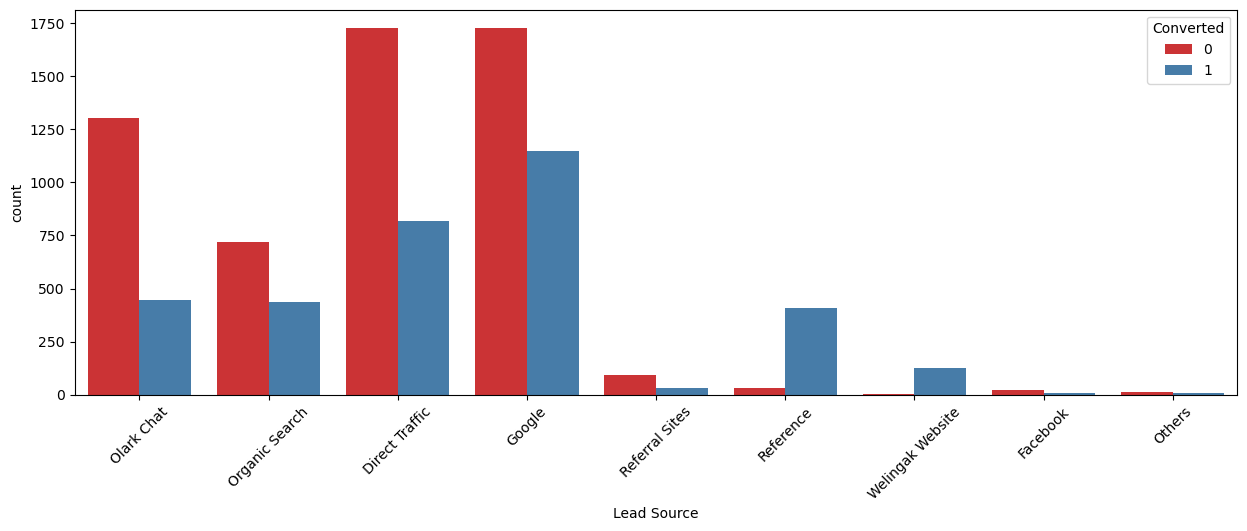

In [56]:
#Visualizing the distribution of 'Lead Source'
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Lead Source', hue='Converted' , data = leads_data , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Observations -
1. For Reference and  Welingak Institute the rate of successful lead conversion is high.
2. For the other categories the rate of succesful leas conversion is low.
3. The maximum distribution is of the catgory "Google" followed by Direct Traffic and Olark Chat

Recommendations - To increase the lead conversion rate, focus should be on the categories - 
- Google
- Direct Traffic
- Olark Chat
- Reference
- Welingak Website

##### 4.2.3: Analysis of 'Do Not Email'

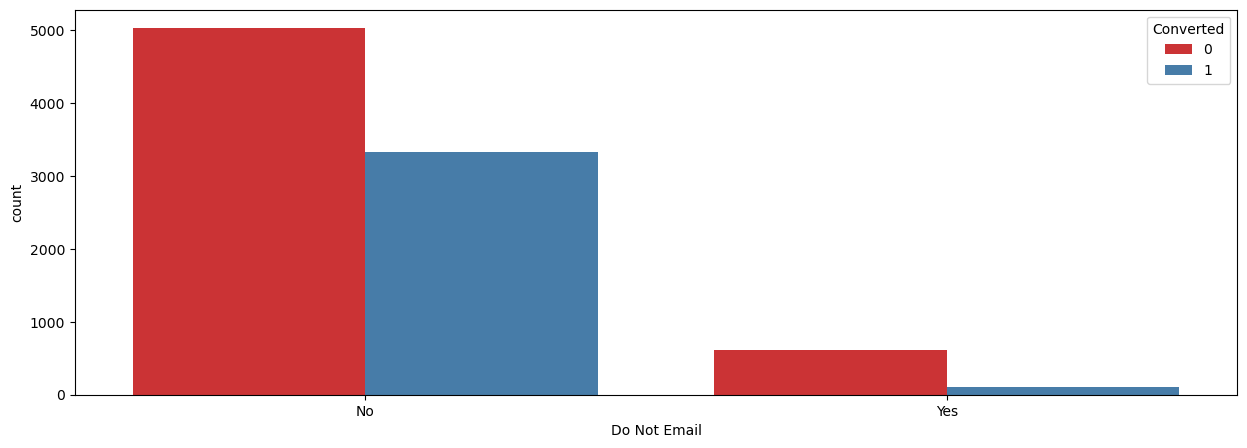

In [57]:
#Visualizing the distribution of 'Do Not Email'
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Do Not Email', hue='Converted' , data = leads_data , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

Observation - There is more lead conversion when user chooses to receive mail communication.

##### 4.2.4: Analysis of 'Last Activity'

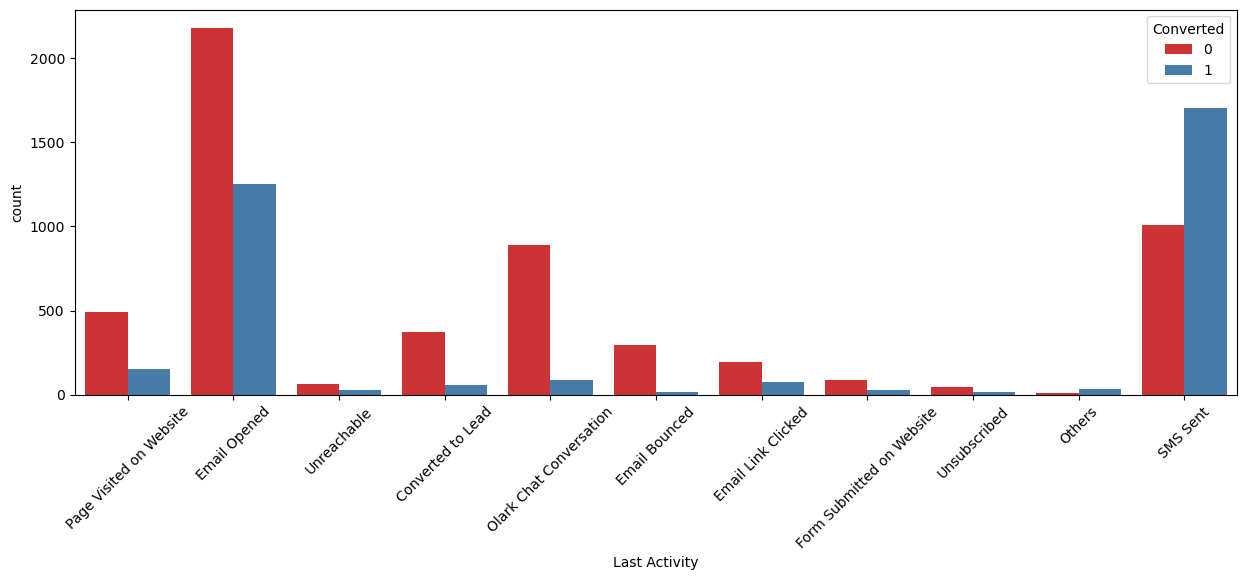

In [58]:
#Visualizing the distribution of 'Last Activity'
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_data , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Observations - 
1. There is more lead conversion when SMS is sent to user.

##### 4.2.5: Analysis of 'What is your current occupation'

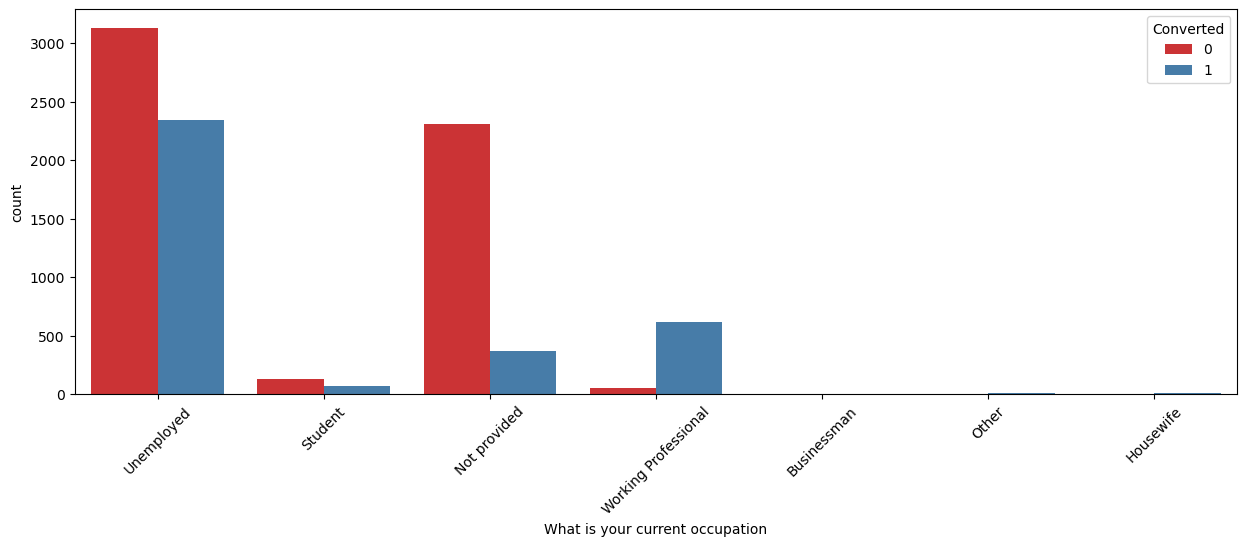

In [59]:
#Visualizing the distribution of 'What is your current occupation'
plt.figure(figsize=(15,5))
s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_data , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Observations - 
1. Lead conversion is low for the case when Occupation is not provided by user
2. Most users in the dataset is Unemployed

##### 4.2.6: Analysis of 'A free copy of Mastering The Interview'

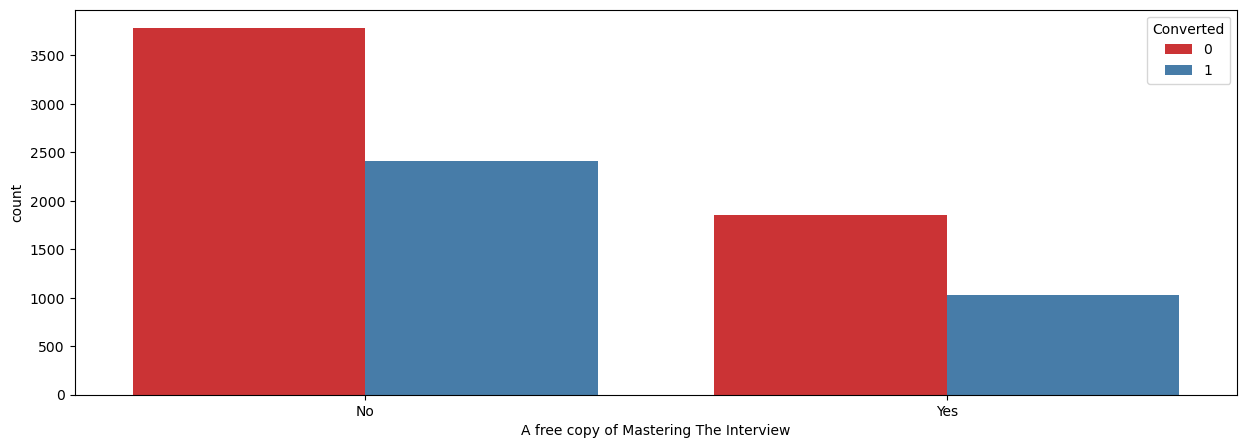

In [60]:
#Visualizing the distribution of 'A free copy of Mastering The Interview'
plt.figure(figsize=(15,5))
s1=sns.countplot(x='A free copy of Mastering The Interview', hue='Converted' , data = leads_data , palette = 'Set1')
s1.set_xticklabels(s1.get_xticklabels())
plt.show()

#### 4.3: Numerical Variable Analysis
Numerical Columns -
1. TotalVisits
2. Total Time Spent on Website
3. Page Views Per Visit

##### 4.3.1: Analysis of 'TotalVisits'

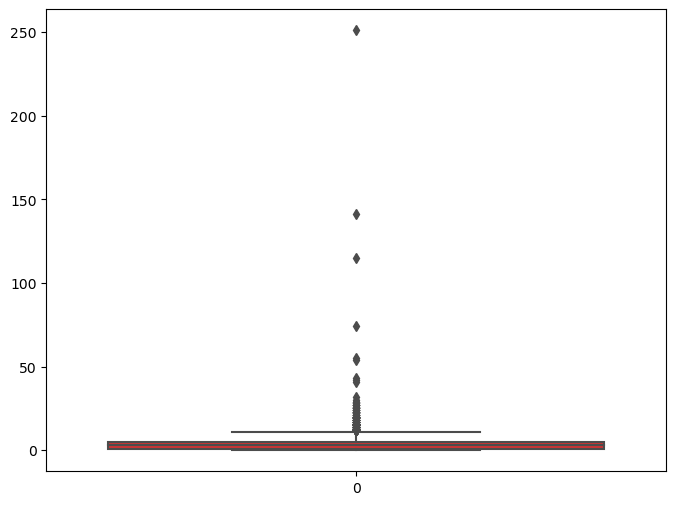

In [61]:
#Visualizing the box plot of 'TotalVisits'
plt.figure(figsize=(8,6))
sns.boxplot(leads_data['TotalVisits'], orient = 'v', palette = 'Set1')
plt.show()

Observation - There are a lot of outliers in this columns. Hence, outlier treatment must be done. There is outlier only on the upper range.

In [62]:
#checking percentile values for "Total Visits"
leads_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [63]:
#Outlier Treatment: capping the upper range outliers to 99% value for analysis
percentiles = leads_data['TotalVisits'].quantile([0,0.99]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

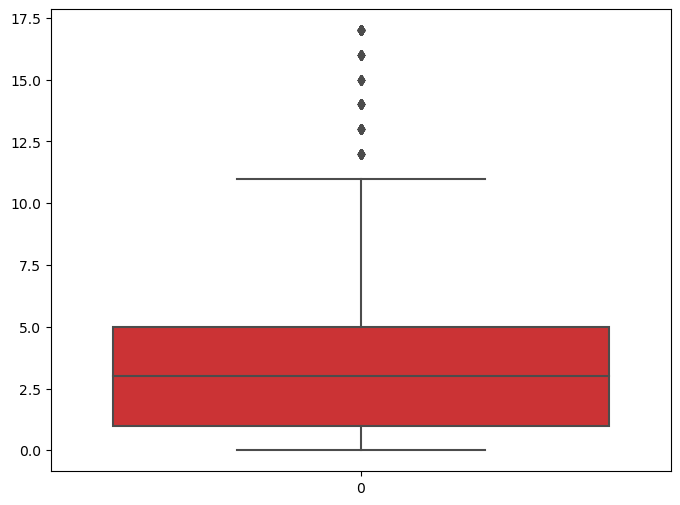

In [64]:
#Visualizing the box plot of 'TotalVisits'
plt.figure(figsize=(8,6))
sns.boxplot(leads_data['TotalVisits'], orient = 'v', palette = 'Set1')
plt.show()

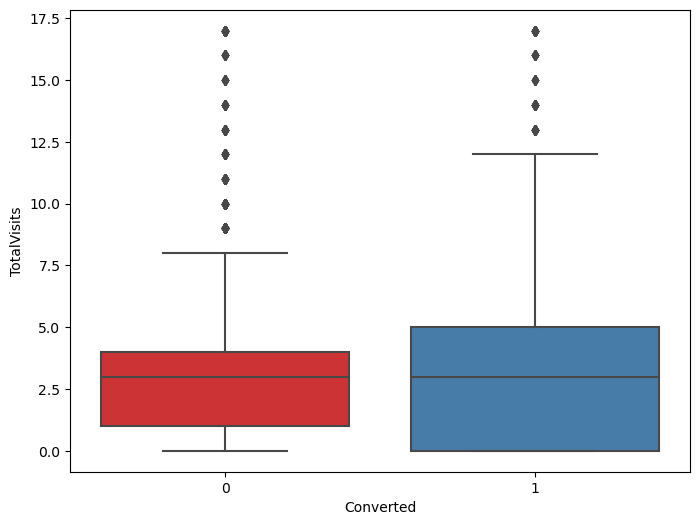

In [65]:
#plotting the boxplot of "TotalVisits" with respect to the Target variable
plt.figure(figsize=(8,6))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data, palette = 'Set1')
plt.show()

##### 4.3.2: Analysis of 'Total Time Spent on Website'

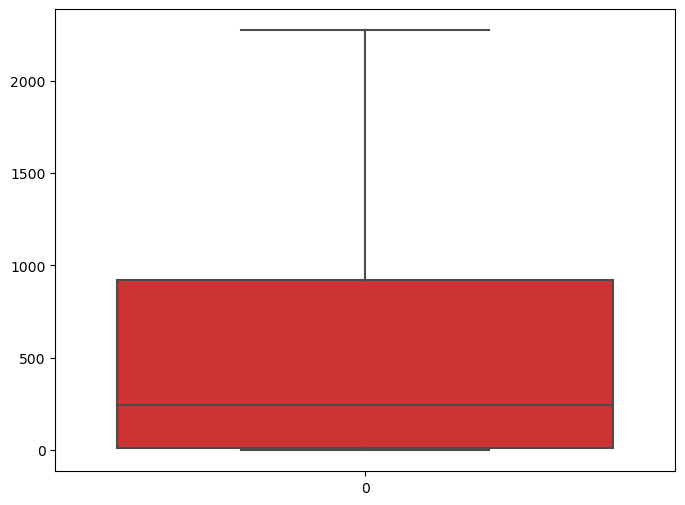

In [66]:
#Visualizing the box plot of 'Total Time Spent on Website'
plt.figure(figsize=(8,6))
sns.boxplot(leads_data['Total Time Spent on Website'], orient = 'v', palette = 'Set1')
plt.show()

There are no outliers in the 'Total Time Spent on Website' variable

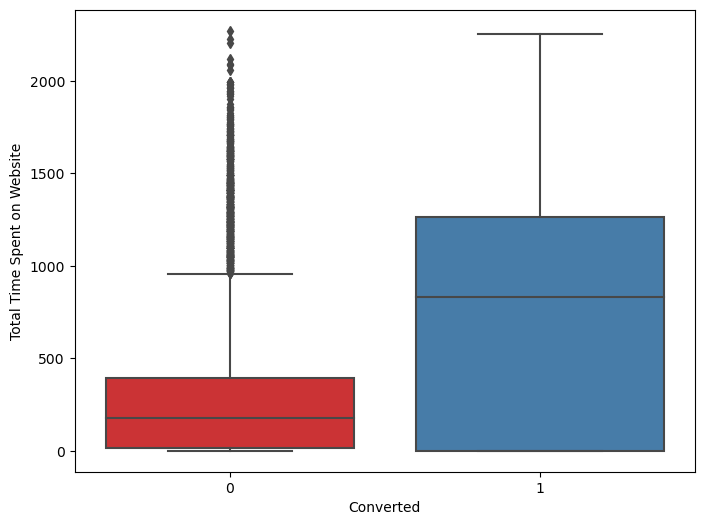

In [67]:
#plotting the boxplot of "Total Time Spent on Website" with respect to the Target variable
plt.figure(figsize=(8,6))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data, palette = 'Set1')
plt.show()

Observation - People spending more time on the website have a higher conversion rate.

##### 4.3.3: Analysis of 'Page Views Per Visit'

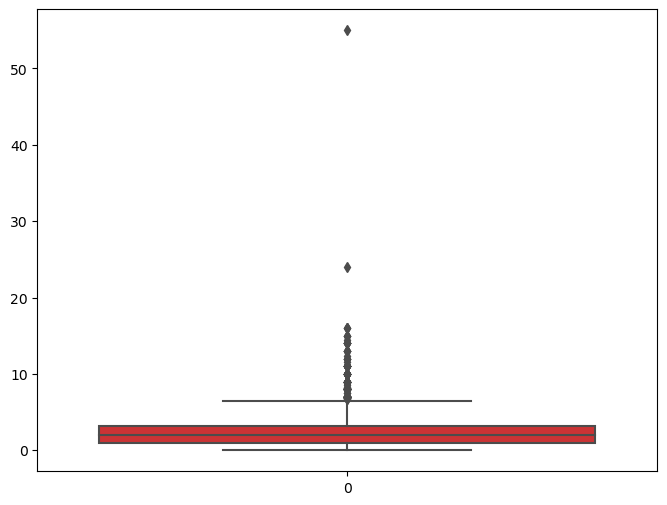

In [68]:
#Visualizing the box plot of 'Page Views Per Visit'
plt.figure(figsize=(8,6))
sns.boxplot(leads_data['Page Views Per Visit'], orient = 'v', palette = 'Set1')
plt.show()

Observation - There are a lot of outliers in this columns. Hence, outlier treatment must be done. There is outlier only on the upper range.

In [69]:
#checking percentile values for "Page Views Per Visit"
leads_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [70]:
#Outlier Treatment: capping the upper range outliers to 99% value for analysis
percentiles = leads_data['Page Views Per Visit'].quantile([0,0.99]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

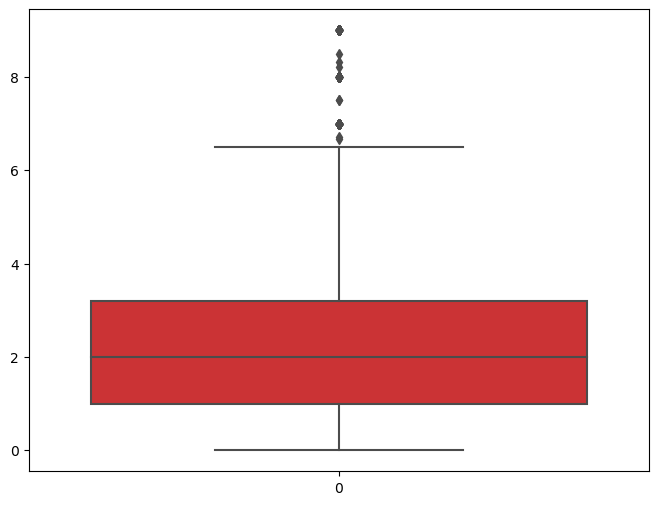

In [71]:
#Visualizing the box plot of 'Page Views Per Visit'
plt.figure(figsize=(8,6))
sns.boxplot(leads_data['Page Views Per Visit'], orient = 'v', palette = 'Set1')
plt.show()

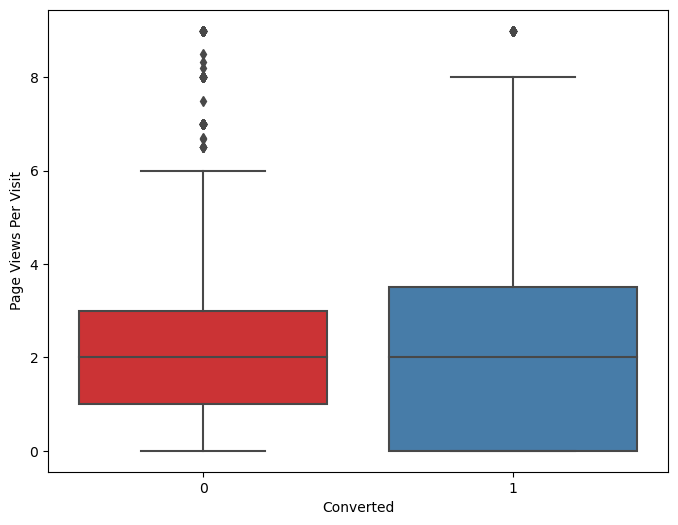

In [72]:
#plotting the boxplot of "Page Views Per Visit" with respect to the Target variable
plt.figure(figsize=(8,6))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data, palette = 'Set1')
plt.show()

### Step 5: Data Preparation for Model Building

In [73]:
#Viewing the head of the data
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


#### 5.1: Conversion of Binary column(Yes/No) to 1/0

In [74]:
cols = ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads_data[cols] = leads_data[cols].apply(binary_map)

In [75]:
#Viewing the head of the data
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0


#### 5.2: Creation of Dummy Variables for the Categorical columns

In [76]:
#creating a list of the categorical columns
cat_cols = ['Lead Origin','Lead Source','Last Activity','What is your current occupation']

In [77]:
dummy_var = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation']], drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
#adding the dummy variables to the original dataset
leads_data = pd.concat([leads_data,dummy_var],axis=1)

In [79]:
#dropping the categorical columns for which dummy variables are created
leads_data.drop(cat_cols,1,inplace = True)

In [80]:
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Step 6: Train-test Split

In [81]:
#Making a copy of the dataset
leads_data_copy=leads_data

In [82]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [83]:
# Putting the target variable to y
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Splitting the data into train and test (70% - train set & 30% - test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [85]:
X_train.shape

(6351, 32)

In [86]:
X_test.shape

(2723, 32)

### Step 7: Feature Scaling using Standard Scalar

In [87]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,2.0,397,2.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1012,1,2.0,190,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,0.0,0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4750,0,2.0,1380,2.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7987,0,5.0,1584,2.5,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [88]:
#initializing the scalar object
scaler = StandardScaler()
#scaling the train dataset
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,-0.417238,-0.160255,-0.177298,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1012,1,-0.417238,-0.540048,-0.177298,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,-1.034493,-0.888650,-1.183128,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4750,0,-0.417238,1.643304,-0.177298,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7987,0,0.508645,2.017593,0.074159,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Step 8: Checking Correlations among the variables 

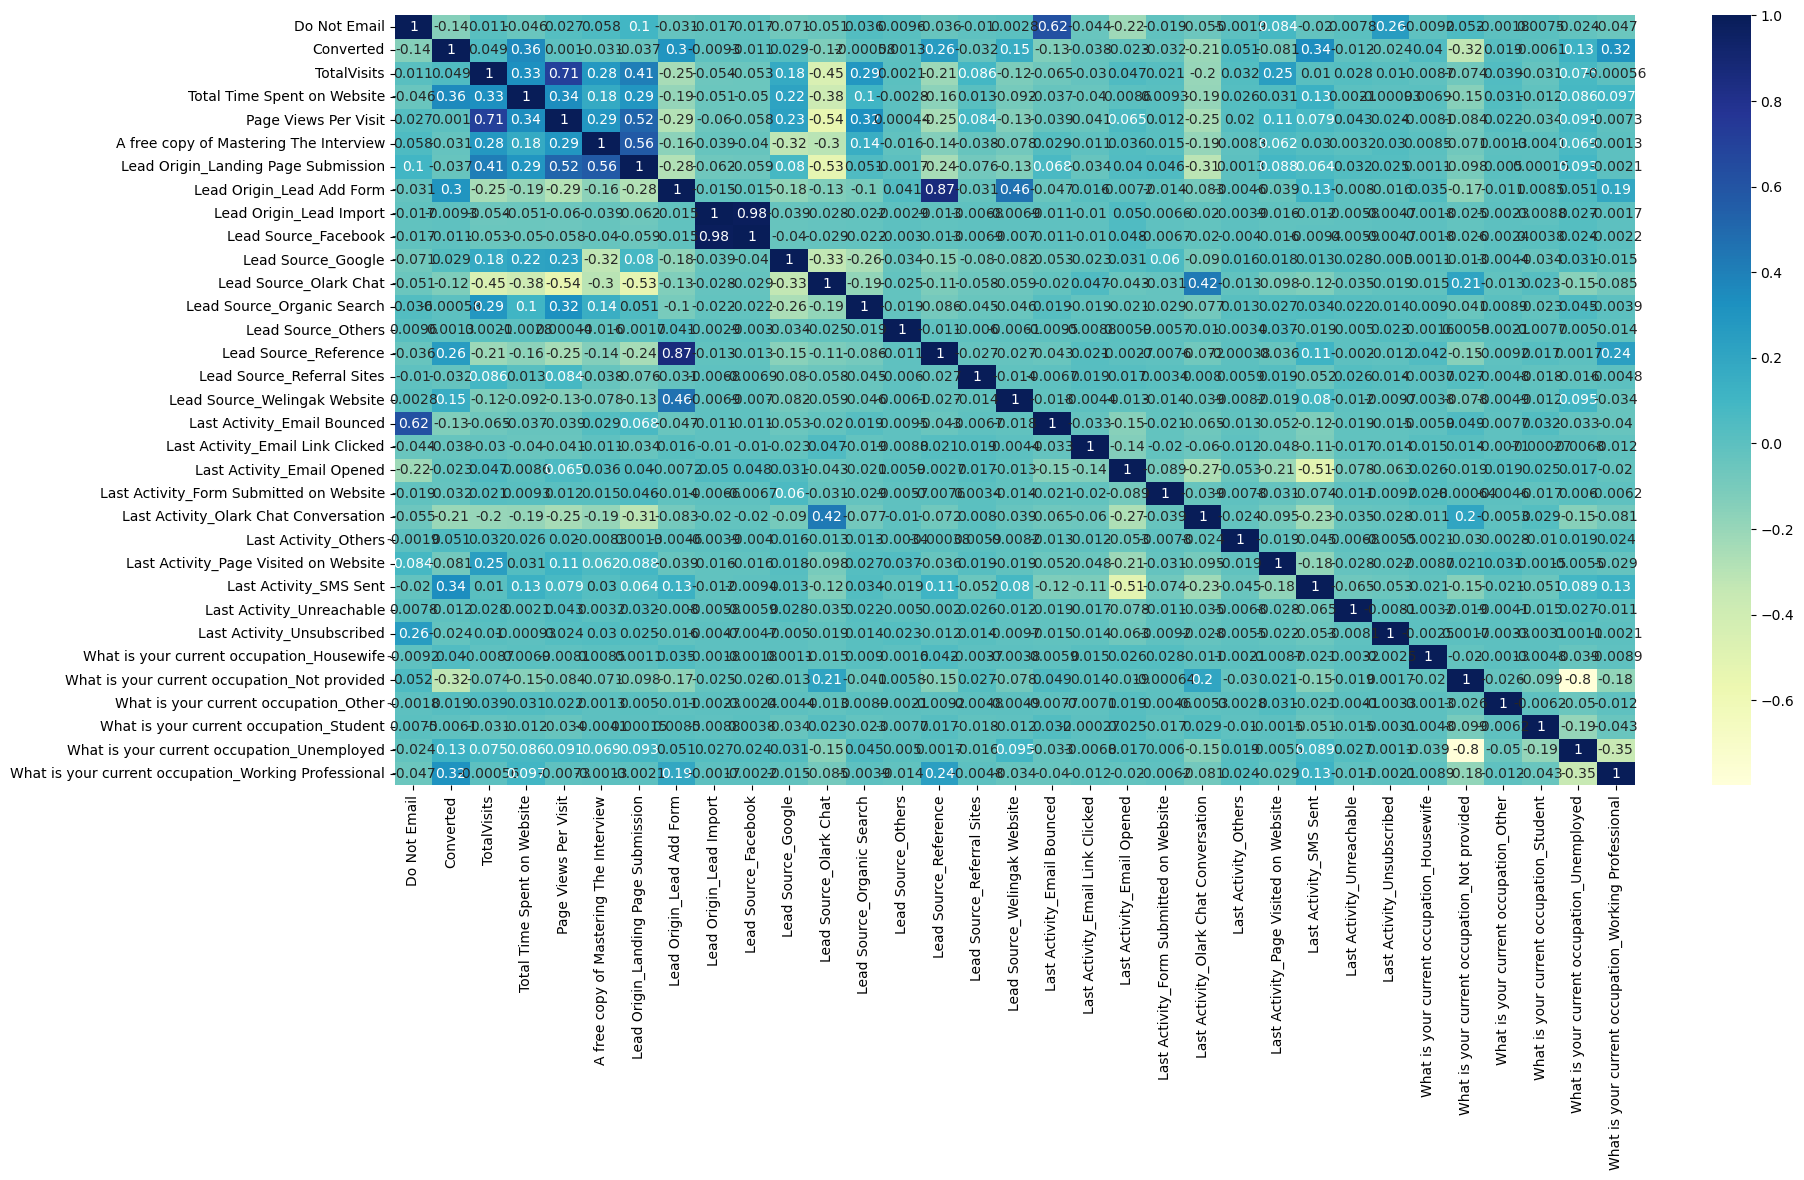

In [89]:
#plotting the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(leads_data.corr(),annot = True,cmap="YlGnBu")
plt.show()

Observation - From the correlation matrix it is clear that pair-wise correlations exist between the variables

### Step 9: Model Building 

In [90]:
#initializaing a logistic regression object
logreg = LogisticRegression()

In [91]:
# running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [92]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True])

In [93]:
#displaying the results of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 7),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS S

In [94]:
#List of columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not provided',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### 9.1: Creation of Model 1

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.2
Date:                Mon, 11 Mar 2024   Deviance:                       5166.3
Time:                        00:17:58   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8962      0.090    -21.172      0.000      -2.072      -1.721
Do Not Email                                            -1.5488      0.194     -8.001      0.000      -1.928      -1.169
Total Time Spent on Website                              1.1459      0.041     27.781      0.000       1.065       1.227
Lead Origin_Lead Add Form                                1.9716      0.894      2.206      0.027       0.220       3.724
Lead Origin_Lead Import                                  1.1374      0.461      2.465      0.014       0.233       2.042
Lead Source_Olark Chat                                   1.3353      0.104     12.834      0.000       1.131       1.539
Lead Source_Reference                                    1.6618      0.919      1.809      0.071      -0.139       3.463
Lead Source_Welingak Website                             3.6499      1.152      3.168      0.002       1.392       5.908
Last Activity_Email Opened                               0.9293      0.097      9.596      0.000       0.739       1.119
Last Activity_Others                                     2.6675      0.475      5.622      0.000       1.737       3.597
Last Activity_SMS Sent                                   2.0638      0.100     20.645      0.000       1.868       2.260
Last Activity_Unreachable                                1.2106      0.310      3.908      0.000       0.603       1.818
Last Activity_Unsubscribed                               2.0235      0.475      4.261      0.000       1.093       2.954
What is your current occupation_Housewife               22.6217   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
What is your current occupation_Not provided            -1.2934      0.088    -14.687      0.000      -1.466      -1.121
What is your current occupation_Working Professional     2.4769      0.188     13.180      0.000       2.109       2.845
========================================================================================================================
"""

The p-value of "What is your current occupation_Housewife" is high, hence we can drop the same.

In [96]:
#dropping column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

#### 9.2: Creation of Model 2

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.3
Date:                Mon, 11 Mar 2024   Deviance:                       5174.6
Time:                        00:17:59   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8924      0.089    -21.155      0.000      -2.068      -1.717
Do Not Email                                            -1.5507      0.194     -8.008      0.000      -1.930      -1.171
Total Time Spent on Website                              1.1453      0.041     27.797      0.000       1.065       1.226
Lead Origin_Lead Add Form                                1.9671      0.894      2.201      0.028       0.216       3.718
Lead Origin_Lead Import                                  1.1314      0.461      2.453      0.014       0.227       2.035
Lead Source_Olark Chat                                   1.3315      0.104     12.806      0.000       1.128       1.535
Lead Source_Reference                                    1.6909      0.919      1.841      0.066      -0.109       3.491
Lead Source_Welingak Website                             3.6502      1.152      3.169      0.002       1.393       5.907
Last Activity_Email Opened                               0.9326      0.097      9.643      0.000       0.743       1.122
Last Activity_Others                                     2.6642      0.475      5.614      0.000       1.734       3.594
Last Activity_SMS Sent                                   2.0609      0.100     20.632      0.000       1.865       2.257
Last Activity_Unreachable                                1.2072      0.310      3.897      0.000       0.600       1.814
Last Activity_Unsubscribed                               2.0229      0.475      4.260      0.000       1.092       2.954
What is your current occupation_Not provided            -1.2962      0.088    -14.723      0.000      -1.469      -1.124
What is your current occupation_Working Professional     2.4720      0.188     13.154      0.000       2.104       2.840
========================================================================================================================
"""

The p-value of "Lead Source_Reference" is high, hence we can drop the same.

In [98]:
#dropping column with high p-value
col = col.drop('Lead Source_Reference',1)

#### 9.3: Creation of Model 3

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.7
Date:                Mon, 11 Mar 2024   Deviance:                       5177.4
Time:                        00:17:59   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8921      0.089    -21.153      0.000      -2.067      -1.717
Do Not Email                                            -1.5469      0.193     -8.003      0.000      -1.926      -1.168
Total Time Spent on Website                              1.1444      0.041     27.775      0.000       1.064       1.225
Lead Origin_Lead Add Form                                3.5908      0.220     16.298      0.000       3.159       4.023
Lead Origin_Lead Import                                  1.1301      0.461      2.450      0.014       0.226       2.034
Lead Source_Olark Chat                                   1.3290      0.104     12.776      0.000       1.125       1.533
Lead Source_Welingak Website                             2.0245      0.757      2.674      0.008       0.540       3.509
Last Activity_Email Opened                               0.9326      0.097      9.643      0.000       0.743       1.122
Last Activity_Others                                     2.6655      0.474      5.620      0.000       1.736       3.595
Last Activity_SMS Sent                                   2.0610      0.100     20.635      0.000       1.865       2.257
Last Activity_Unreachable                                1.2081      0.310      3.903      0.000       0.601       1.815
Last Activity_Unsubscribed                               2.0198      0.475      4.255      0.000       1.089       2.950
What is your current occupation_Not provided            -1.2957      0.088    -14.720      0.000      -1.468      -1.123
What is your current occupation_Working Professional     2.4743      0.188     13.174      0.000       2.106       2.842
========================================================================================================================
"""

In this model the p-values for all the variables in low. Now we shall check the VIFs of variables.

In [100]:
#Checking the VIFs of the variables
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.61
4,Lead Source_Olark Chat,1.41
11,What is your current occupation_Not provided,1.38
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.31
8,Last Activity_SMS Sent,1.29
6,Last Activity_Email Opened,1.26
12,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.14
10,Last Activity_Unsubscribed,1.08


The VIFs of all the variables is low. Hence, we do not need to drop any more variables. Model 3 will be our final model.

### Step 10: Prediction on the Train set 

#### 10.1: Predicting the values in the train set

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.080281
1012    0.170403
9226    0.617979
4750    0.679991
7987    0.922566
1281    0.771706
2880    0.036838
4971    0.912739
7536    0.898129
1248    0.908467
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08028054, 0.17040291, 0.6179789 , 0.67999068, 0.92256562,
       0.77170574, 0.03683827, 0.91273949, 0.89812895, 0.90846729])

#### 10.2: Creating a dataframe with the actual Converted flag and the predicted probabilities

In [103]:
# Creating dataframe 'y_train_pred_final' with actual and predicted
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
# Adding column 'Prospect ID' for indexing
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.080281,3009
1,0,0.170403,1012
2,0,0.617979,9226
3,1,0.679991,4750
4,1,0.922566,7987


In [104]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.080281,3009,0
1,0,0.170403,1012,0
2,0,0.617979,9226,1
3,1,0.679991,4750,1
4,1,0.922566,7987,1


The model with an arbitrary cut-off at 0.5 has an accuracy of 81.32%

#### 10.3: Calculating the different Logistic Regression metrics - Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [105]:
#checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8132577546843017


In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3464  441]
 [ 745 1701]]


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
#Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value
print("Accuracy {}".format((TN+TP)/float(TN+TP+FP+FN)))
print("Sensitivity {}".format(TP/float(TP+FN)))
print("Specificity {}".format(TN/float(TN+FP)))
print("False Positive Rate {}".format(FP/float(TN+FP)))
print("Positive Predictive Value {}".format(TP/float(TP+FP)))
print("Negative Predictive Value {}".format(TN/float(TN+ FN)))

Accuracy 0.8132577546843017
Sensitivity 0.6954210956663941
Specificity 0.887067861715749
False Positive Rate 0.11293213828425096
Positive Predictive Value 0.7941176470588235
Negative Predictive Value 0.8229983368971252


### Step 11: Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

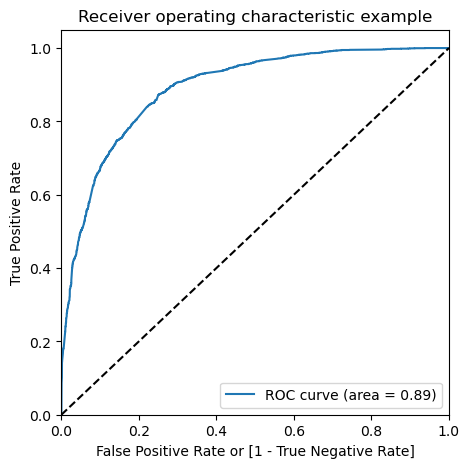

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Observation - The ROC curve should be close to 1. In this case the ROC curve is 0.89, indicating a good predictive model.

### Step 12: Finding the Optimal Cut-off point
Optimal cutoff point is that probability where we get balanced sensitivity and specificity

#### 12.1: Finding the cut-off point

In [112]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.080281,3009,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.170403,1012,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.617979,9226,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
3,1,0.679991,4750,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
4,1,0.922566,7987,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [113]:
#Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

      Probability  Accuracy  Sensitivity  Specificity
0.00         0.00  0.385136     1.000000     0.000000
0.05         0.05  0.485435     0.996729     0.165173
0.10         0.10  0.623839     0.979967     0.400768
0.15         0.15  0.702724     0.949305     0.548271
0.20         0.20  0.762715     0.919052     0.664789
0.25         0.25  0.785546     0.896157     0.716261
0.30         0.30  0.793261     0.876942     0.740845
0.35         0.35  0.806487     0.802944     0.808707
0.40         0.40  0.810266     0.764105     0.839181
0.45         0.45  0.813888     0.730581     0.866069
0.50         0.50  0.813258     0.695421     0.887068
0.55         0.55  0.810896     0.664759     0.902433
0.60         0.60  0.807117     0.634505     0.915237
0.65         0.65  0.789167     0.560507     0.932394
0.70         0.70  0.779562     0.519215     0.942638
0.75         0.75  0.772319     0.481194     0.954673
0.80         0.80  0.758306     0.427637     0.965429
0.85         0.85  0.735002 

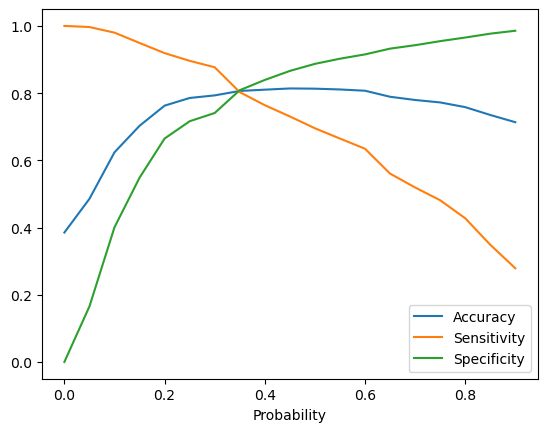

In [114]:
#Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From the above curve, considering the Optimal Cut-off point to be 0.35

In [115]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,Final_Predicted
0,0,0.080281,3009,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.170403,1012,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.617979,9226,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
3,1,0.679991,4750,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,1
4,1,0.922566,7987,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [116]:
#Creating a new variable "Lead_Score"
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','Final_Predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,Final_Predicted,Lead_Score
0,0,0.080281,3009,0,8
1,0,0.170403,1012,0,17
2,0,0.617979,9226,1,62
3,1,0.679991,4750,1,68
4,1,0.922566,7987,1,92


In [117]:
#checking the target lead conversion rate
check = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','Final_Predicted']]
check['Final_Predicted'].value_counts()

1    1964
0     482
Name: Final_Predicted, dtype: int64

In [118]:
1964/float(1964+482)

0.802943581357318

#### 12.2: Calculating the different Logistic Regression metrics - Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [119]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion2)

[[3464  441]
 [ 745 1701]]


In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
#Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value
print("Accuracy {}".format((TN+TP)/float(TN+TP+FP+FN)))
print("Sensitivity {}".format(TP/float(TP+FN)))
print("Specificity {}".format(TN/float(TN+FP)))
print("False Positive Rate {}".format(FP/float(TN+FP)))
print("Positive Predictive Value {}".format(TP/float(TP+FP)))
print("Negative Predictive Value {}".format(TN/float(TN+ FN)))

Accuracy 0.8132577546843017
Sensitivity 0.6954210956663941
Specificity 0.887067861715749
False Positive Rate 0.11293213828425096
Postitive Predictive Value 0.7941176470588235
Negetive Predictive Value 0.8229983368971252


#### 12.3: Calculating the Precision and Recall

In [122]:
#calculating the Precison and Recall
precision = precision_score(y_train_pred_final.Converted , y_train_pred_final.Final_Predicted)
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
print("Precision {}".format(precision))
print("Recall {}".format(recall))

Precision 0.7244559203246035
Recall 0.802943581357318


#### 12.4: Precision and Recall Trade-off

In [123]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

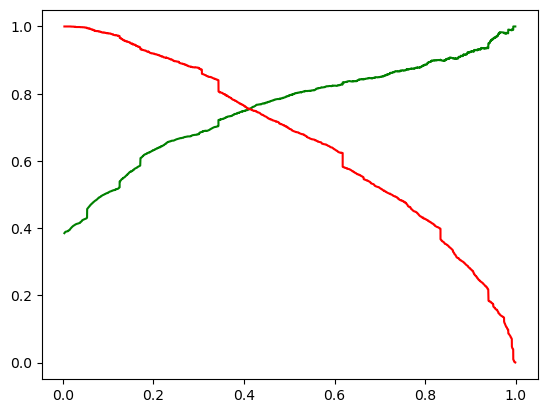

In [125]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 13: Predictions on the Test Set

#### 13.1: Scaling the Test set

In [126]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Not provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3009,0,-0.417238,-0.160255,-0.177298,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1012,1,-0.417238,-0.540048,-0.177298,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9226,0,-1.034493,-0.888650,-1.183128,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4750,0,-0.417238,1.643304,-0.177298,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7987,0,0.508645,2.017593,0.074159,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [127]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Not provided,What is your current occupation_Working Professional
3271,0,-0.600595,0,0,0,0,1,0,0,0,0,1,0
1490,0,1.887326,0,0,0,0,1,0,0,0,0,0,1
7936,0,-0.752879,0,0,0,0,1,0,0,0,0,1,0
4216,0,-0.888650,1,0,0,0,1,0,0,0,0,0,0
3830,0,-0.587751,0,0,0,0,1,0,0,0,0,1,0


#### 13.2: Prediction on the Test Set

In [128]:
X_test_sm = sm.add_constant(X_test)

In [129]:
y_test_pred = res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

3271    0.050095
1490    0.975266
7936    0.042423
4216    0.834025
3830    0.050799
1800    0.658681
6507    0.359579
4821    0.367147
4223    0.939505
4714    0.306889
dtype: float64

In [131]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.050095
1490,0.975266
7936,0.042423
4216,0.834025
3830,0.050799


In [132]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [133]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [134]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.050095
1,1,1490,0.975266
2,0,7936,0.042423
3,1,4216,0.834025
4,0,3830,0.050799


In [137]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [138]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [139]:
# head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.050095
1,1490,1,0.975266
2,7936,0,0.042423
3,4216,1,0.834025
4,3830,0,0.050799


In [140]:
# Adding the column 'Final_Predited'
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,3271,0,0.050095,0
1,1490,1,0.975266,1
2,7936,0,0.042423,0
3,4216,1,0.834025,1
4,3830,0,0.050799,0


In [141]:
# Assigning a Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,3271,0,0.050095,0,5
1,1490,1,0.975266,1,98
2,7936,0,0.042423,0,4
3,4216,1,0.834025,1,83
4,3830,0,0.050799,0,5


In [142]:
#checking the target lead conversion rate
check = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Final_Predicted']]
check['Final_Predicted'].value_counts()

1    771
0    218
Name: Final_Predicted, dtype: int64

In [143]:
771/float(771+218)

0.7795753286147624

#### 13.3: Calculating the different Logistic Regression metrics - Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [144]:
# Confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
print(confusion3)

[[1407  327]
 [ 218  771]]


In [149]:
#Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value
print("Accuracy {}".format((TN+TP)/float(TN+TP+FP+FN)))
print("Sensitivity {}".format(TP/float(TP+FN)))
print("Specificity {}".format(TN/float(TN+FP)))#### 12.3: Calculating the Precision and Recall
print("False Positive Rate {}".format(FP/float(TN+FP)))
print("Positive Predictive Value {}".format(TP/float(TP+FP)))
print("Negative Predictive Value {}".format(TN/float(TN+ FN)))

Accuracy 0.8132577546843017
Sensitivity 0.6954210956663941
Specificity 0.887067861715749
False Positive Rate 0.11293213828425096
Positive Predictive Value 0.7941176470588235
Negative Predictive Value 0.8229983368971252


#### 13.4: Calculating the Precision and Recall

In [148]:
#calculating the Precison and Recall
precision = precision_score(y_pred_final.Converted , y_pred_final.Final_Predicted)
recall = recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
print("Precision {}".format(precision))
print("Recall {}".format(recall))

Precision 0.7021857923497268
Recall 0.7795753286147624
